**Nama : Gustania Nirmala Meisi**<br>
**NIM : 2041720107**<br>
**Kelas : TI 3H**

1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
4. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
5. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (20 poin)
6. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_quiz.csv')
df = df.fillna(0) #mengisi nilai yang kosong dengan 0
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            85 non-null     float64
 1   id_anggota1         85 non-null     float64
 2   id_anggota2         85 non-null     float64
 3   id_anggota3         85 non-null     float64
 4   id_anggota4         85 non-null     float64
 5   id_anggota5         85 non-null     float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

In [4]:
df.describe()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,jml_vltr_terlibat,tahun
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,7674.129412,7676.388235,7877.023529,8121.905882,7261.317647,103.670588,1.341176,2020.611765
std,1703.960350,2243.344554,2273.224681,1901.051968,3275.275962,955.795597,1.452034,1.155670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
25%,7308.000000,7607.000000,7801.000000,8101.000000,8005.000000,0.000000,0.000000,2020.000000
50%,8102.000000,8305.000000,8704.000000,8702.000000,8901.000000,0.000000,0.000000,2021.000000
75%,8602.000000,8901.000000,8907.000000,8905.000000,9003.000000,0.000000,3.000000,2022.000000
max,9209.000000,9402.000000,9402.000000,9303.000000,9303.000000,8812.000000,4.000000,2022.000000


### **Nomer 1**

#### Jenis Visualisasi

##### KDEplot (Jumlah keterlibatan volunteer menurut tahun)

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


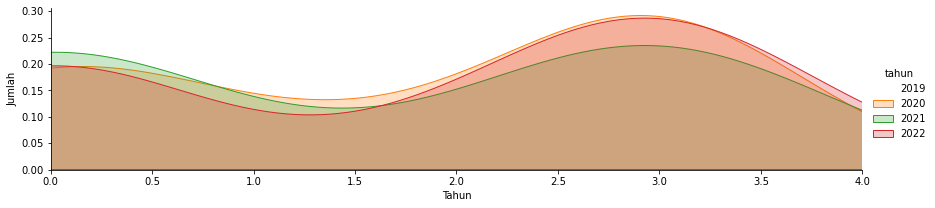

In [5]:
fig = sns.FacetGrid(df, hue='tahun', aspect=4)
fig.map(sns.kdeplot,'jml_vltr_terlibat',shade=True)
oldest = df['jml_vltr_terlibat'].max()
plt.ylabel('Jumlah')
plt.xlabel('Tahun')
fig.set(xlim=(0,oldest))
fig.add_legend()

##### Scatter Plot

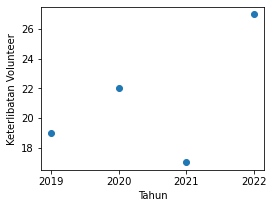

In [6]:
tahun = df.groupby('tahun').count()
names = ['2019', '2020', '2021', '2022']
values = tahun['keterlibatan_vltr'].values
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(3)
plt.scatter(names, values)
plt.xlabel('Tahun')
plt.ylabel('Keterlibatan Volunteer')
plt.show()

##### Histogram

AxesSubplot(0.125,0.125;0.775x0.755)


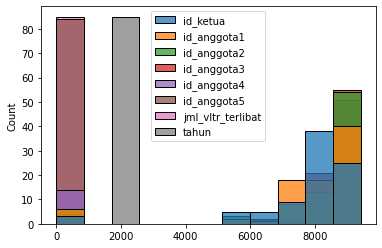

In [7]:
print(sns.histplot(df))

##### Bar Plot

Text(0, 0.5, 'Jumlah Volunteer Terlibat')

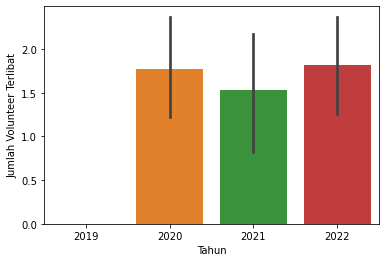

In [8]:
ax = sns.barplot(x = 'tahun', y = 'jml_vltr_terlibat', data = df)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer Terlibat')

##### Regression Plot

Text(0, 0.5, 'Jumlah Volunteer Terlibat')

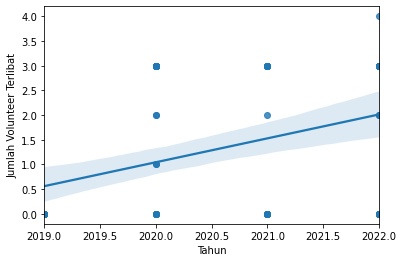

In [9]:
ax = sns.regplot(x = 'tahun', y = 'jml_vltr_terlibat', data = df)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer Terlibat')

### **Nomer 2**

In [10]:
from sklearn.preprocessing import LabelEncoder
# Inisiasi label encoder
encode = LabelEncoder()

df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['skema'] = encode.fit_transform(df['skema'])
df['tahun'] = encode.fit_transform(df['tahun'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])

# Cek hasil
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,0,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,0,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,0,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,0,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,0,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,1,3,3,1,1,1,2,0,3,1
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,1,3,3,1,1,1,2,0,3,1
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,1,3,3,1,1,1,2,0,3,1
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,1,3,3,1,1,1,2,0,3,1


c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


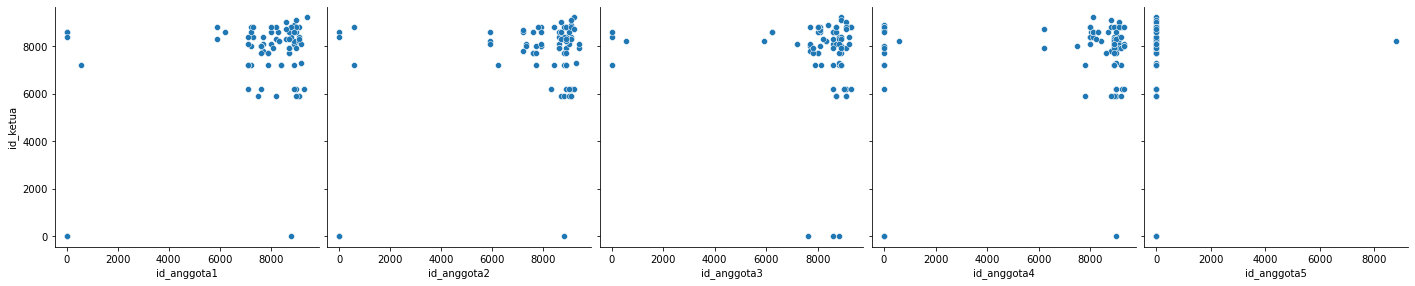

In [11]:
# operasi visualisasi
sns.pairplot(df, x_vars=['id_anggota1','id_anggota2', 'id_anggota3','id_anggota4','id_anggota5'], 
             y_vars='id_ketua', size=4, aspect=1, kind='scatter')
plt.show()

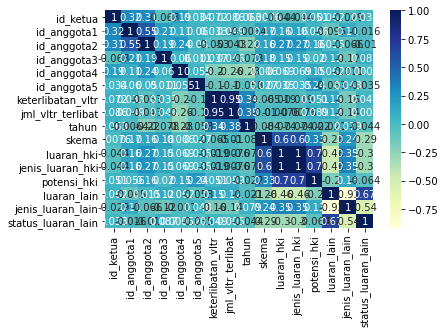

In [12]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [13]:
df['id_ketua'] = df['id_ketua'].astype(float)
df['id_anggota1'] = df['id_anggota1'].astype(float)
df['id_anggota2'] = df['id_anggota2'].astype(float)
df['id_anggota3'] = df['id_anggota3'].astype(float)
df['id_anggota4'] = df['id_anggota4'].astype(float)
df['id_anggota5'] = df['id_anggota5'].astype(float)
print(df.dtypes)

id_ketua              float64
id_anggota1           float64
id_anggota2           float64
id_anggota3           float64
id_anggota4           float64
id_anggota5           float64
keterlibatan_vltr       int32
jml_vltr_terlibat       int64
tahun                   int64
skema                   int32
luaran_hki              int32
jenis_luaran_hki        int32
potensi_hki             int32
luaran_lain             int32
jenis_luaran_lain       int32
status_luaran_lain      int32
dtype: object


In [17]:
# Memisahkan fitur dengan label
label = df.iloc[:,[6,7,8,9,10,11,12,13,14,15]]
X = df.iloc[:,:5]
y = label.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### **Tugas 3**

#### Klasifikasi Naive Bayes Categorical

In [19]:
# Kita akan menggunakan CategoricalNB untuk kasus ini
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Inisasi CategoricalNB
cnb = CategoricalNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
cnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = cnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = cnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9558823529411765
Hasil akurasi data test: 0.47058823529411764


#### Klasifikasi Naive Bayes Gaussian

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisiasi obyek MultinomialNB
gnb = GaussianNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6323529411764706
Hasil akurasi data test: 0.47058823529411764


### **Tugas 4**

#### Regresi Linear

In [21]:
# keterangan tahun [2019 = 0], [2020 = 1], [2021 = 2], [2022 = 3]
tahun_2020 = df[(df['tahun'] == 1)]

In [25]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = tahun_2020['id_ketua']
y = tahun_2020['jml_vltr_terlibat']

In [26]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [27]:
# hasil training dtaset
X_train
y_train

19    1
20    0
36    2
30    3
32    3
24    0
21    3
23    3
33    3
29    3
35    0
34    3
26    3
22    3
27    2
Name: jml_vltr_terlibat, dtype: int64

In [28]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [29]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       6.132974
id_ketua   -0.000511
dtype: float64

In [30]:
# analisis statistika dari garis regresi
lr.summary()

c:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      jml_vltr_terlibat   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.137
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.306
Time:                        15:57:36   Log-Likelihood:                -23.436
No. Observations:                  15   AIC:                             50.87
Df Residuals:                      13   BIC:                             52.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1330      3.765      1.629      0.127      -2.001      14.267
id_ketua      -0.0005      0.000     -1.066      0.306      -0.002       0.001
==============================================================================
Omnibus:                        3.300   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.995
Skew:                          -0.680   Prob(JB):                        0.369
Kurtosis:                       1.842   Cond. No.                     9.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

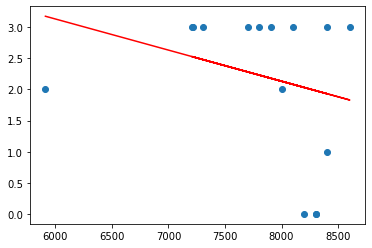

In [31]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.1330 + -0.0005*X_train, 'r')
plt.show()

#### Residual Analysis

In [32]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


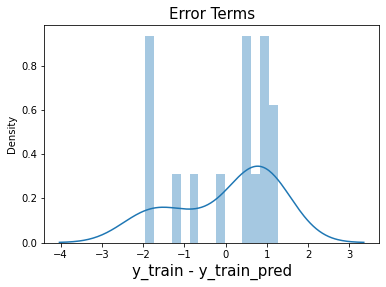

In [33]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

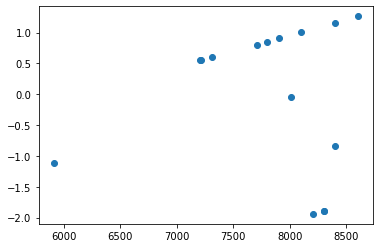

In [34]:
plt.scatter(X_train,res)
plt.show()

In [35]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

40    2.958307
31    2.196203
28    2.961885
25    1.632420
39    1.736181
dtype: float64

In [36]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-1.3804758925135512

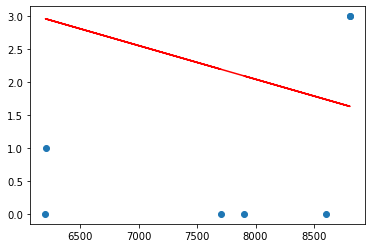

In [37]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### **Tugas 5**

In [38]:
import itertools
from sklearn import svm
from sklearn import metrics

In [40]:
X = df.iloc[:,:5]
y = label.iloc[:,0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [42]:
y_train[:10].head()

32    1
56    0
24    0
7     0
39    0
Name: keterlibatan_vltr, dtype: int32

In [43]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [44]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [45]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [46]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [47]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.4720303 , 0.49383264, 0.46658833, 0.5       , 0.41290833]),
 array([0, 0, 0, 0, 1]),
 33    1
 30    1
 45    1
 8     0
 78    1
 Name: keterlibatan_vltr, dtype: int32)

#### Confusion Matrix

In [48]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[9, 0],
       [6, 2]], dtype=int64)

In [49]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [50]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[9, 0],
       [6, 2]])

Text(0.5, 15.0, 'Predicted label')

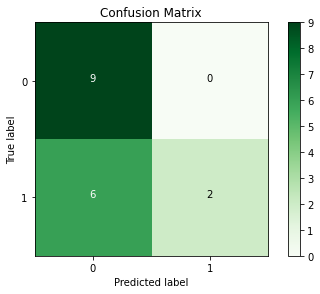

In [51]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:

TP = true_pos = 2
TN = true_neg = 9
FP = false_pos = 0
FN = false_neg = 6

In [53]:
results = {}

##### Acurracy

In [54]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.647


##### True Positive Rate

In [55]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.250


##### True Negative Rate

In [56]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  1.000


##### Positive Predictive Value

In [57]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  1.000


##### Negative Predictive Value

In [58]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.600


##### F1 Score

In [59]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.400


##### Matthew's correlation coefficient

In [60]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.387


##### Membandingkan metrik yang telah dihitung

In [61]:
print(f"Calculated dan Actual Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated dan Actual Accuracy:                           0.647,  0.647
Calculated dan Actual Precision score:                    1.000,  1.000
Calculated dan Actual Recall score:                       0.250,  0.250
Calculated dan Actual F1 score:                           0.400,  0.400
Calculated dan Actual Matthew's correlation coefficient:  0.387,  0.387


#### ROC curve (Receiver Operating Characteristic curve)

In [62]:
def get_roc_curve(y_test, y_proba, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [63]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

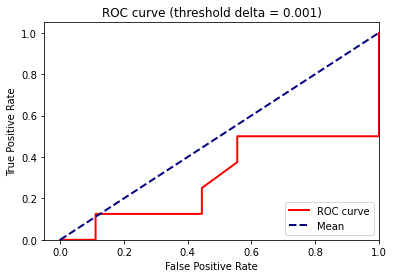

In [64]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [65]:
rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:5] 

array([0.69092403, 0.78784043, 0.33389711, 0.76870811, 0.85708615])

In [66]:
FPRs, TPRs, _ = get_roc_curve(y_test, rand_proba, delta)  

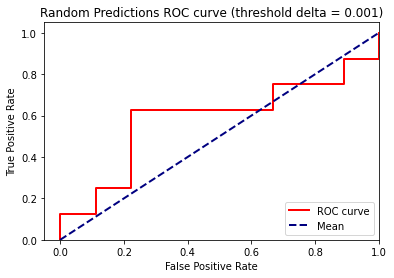

In [67]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Predictions ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [68]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

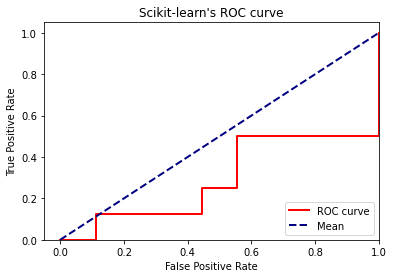

In [69]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [70]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, rand_proba) 

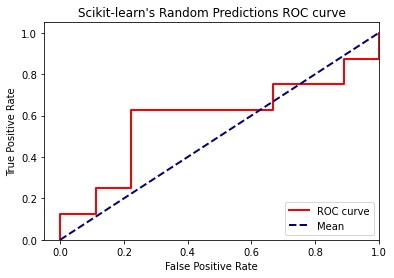

In [71]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's Random Predictions ROC curve")
plt.legend(loc="lower right")
plt.show()

##### ROC-AUC score

In [72]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.2917


In [73]:
def get_roc_auc_score(y_test, y_proba):
    
    FPRs, TPRs, _ = get_roc_curve(y_test, y_proba)
    FPRs.reverse()
    TPRs.reverse()
    x1, y1 = FPRs[0], TPRs[0]
    auc = 0.0
    prev = 0.0

    diffs = [FPRs[i] - FPRs[i-1] for i in range(1, len(FPRs))]
    for x, y in zip(diffs, TPRs[1:]):
        auc += (x * y1)
        auc += (x * (y - y1)/2) 
        y1 = y
    return auc

In [74]:
auc_score = get_roc_auc_score(y_test, y_proba)
print(f"ROC-AUC score dari SVC model adalah {auc_score: .4f}")

ROC-AUC score dari SVC model adalah  0.4444


In [75]:
auc_score = metrics.roc_auc_score(y_test, rand_proba)
print(f"Scikit's ROC-AUC score dari random predictions adalah: {auc_score: .4f}")
auc_score = get_roc_auc_score(y_test, rand_proba)
print(f"ROC-AUC score dari random predictions adalah:      {auc_score: .4f}")

Scikit's ROC-AUC score dari random predictions adalah:  0.5833
ROC-AUC score dari random predictions adalah:       0.5764
